In [1]:
import os
import cv2
import torch
import torch.nn as nn
import numpy as np
from mmdet.apis import init_detector, inference_detector
import mmdet
import mmcv
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

d:\Anaconda3\envs\cctn-v2\lib\site-packages\mmcv\__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [ ]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
import mmcv.image as mmcv_image

In [ ]:
# Original model
config_file = './CascadeTabNet/Config/cascade_mask_rcnn_hrnetv2p_w32_20e_v2.py'
# config_file = './configs/config_v2.py'
checkpoint_file = './checkpoints/epoch_36_v2.pth'  
model = init_detector(config_file, checkpoint_file, device='cuda:0')
model.CLASSES = ['table']

In [16]:
# Finetuned model
config_file = './configs/config_v2.py'
checkpoint_file = './checkpoints/best_bbox_mAP_epoch_13.pth'  
#checkpoint_file = './epoch_36.pth'
model1 = init_detector(config_file, checkpoint_file, device='cuda:0')
model1.CLASSES = ['table']

load checkpoint from local path: ./checkpoints/best_bbox_mAP_epoch_13.pth


d:\Anaconda3\envs\cctn-v2\lib\site-packages\mmdet\apis\inference.py:51: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


In [ ]:
def visualize_detection_results(model, image_path, output_file=None, score_thr=0.85, bbox_color='green', text_color='green'):
    """
    Visualize detection results for an image with the new version model.

    Parameters:
    - model: The detection model.
    - image_path: Path to the input image.
    - output_file: Path to save the output image (optional).
    - score_thr: Confidence score threshold for visualizing detections.
    - bbox_color: Color of bounding boxes.
    - text_color: Color of class labels.

    Returns:
    - None
    """
    # Read and preprocess the image
    img = mmcv.imread(image_path)
    img_resized = mmcv.imresize(img, (1333, 800))

    # Perform inference
    result = inference_detector(model, img_resized)

    # Set the class names for visualization
    model.CLASSES = ['table']

    # Generate visualization
    out_img = model.show_result(
        img_resized,
        result,
        score_thr=score_thr,
        bbox_color=bbox_color,
        text_color=text_color,
        show=False,
        out_file=output_file  # Save output if specified
    )

    # Display the image using matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(mmcv.bgr2rgb(out_img))  # Convert BGR to RGB for matplotlib
    plt.axis('off')
    plt.show()

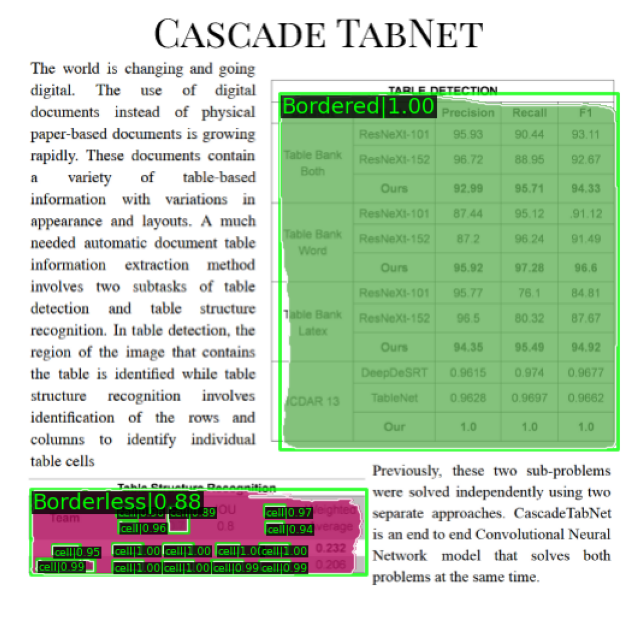

In [ ]:
img = mmcv.imread('./imgs/demo.png')
result = inference_detector(model, img)
model.CLASSES = ['Bordered', 'cell', 'Borderless']

out_img = model.show_result(
    img,
    result,
    score_thr=0.85,
    bbox_color='green',
    text_color='green',
    show=False  
)

plt.figure(figsize=(10, 8))
plt.imshow(mmcv.bgr2rgb(out_img)) 
plt.axis('off')
plt.show()

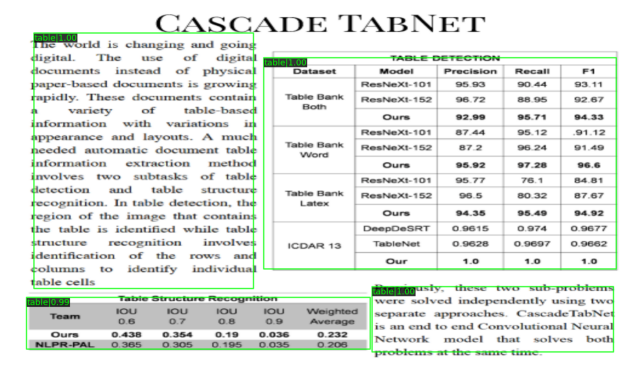

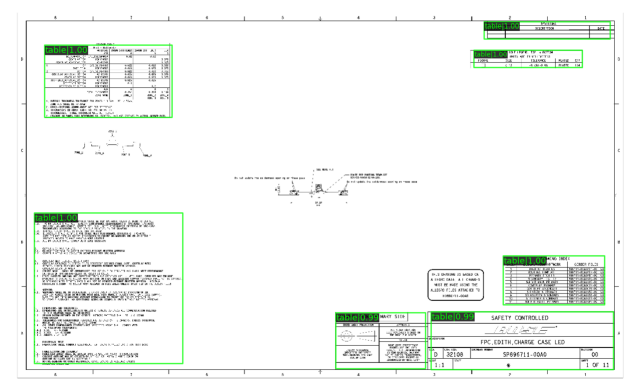

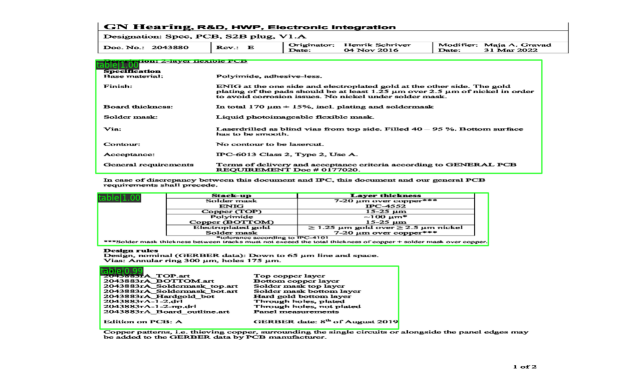

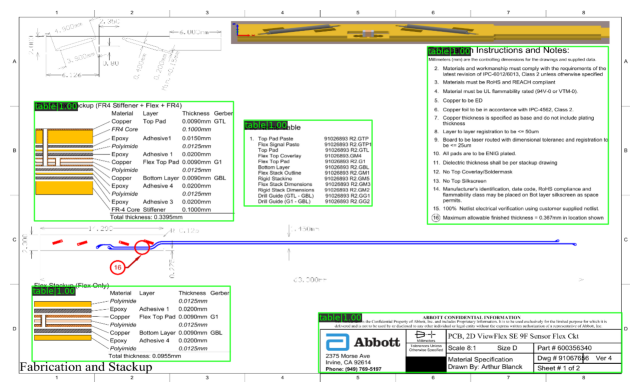

In [19]:
# images from different set
img = mmcv.imread('./imgs/demo.png')
img1 = './imgs/image_18.png'
img2 = './imgs/image_20.png'
img3 = './imgs/image_35.png'

visualize_detection_results(model1, img)
visualize_detection_results(model1, img1)
visualize_detection_results(model1, img2)
visualize_detection_results(model1, img3)

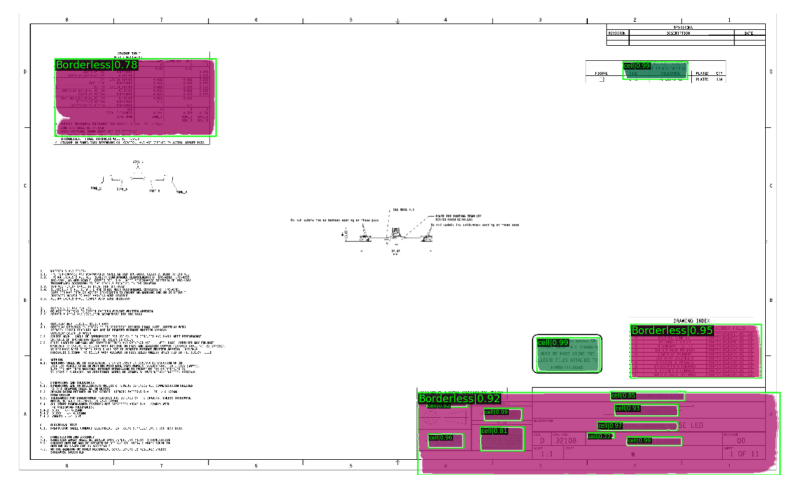

In [ ]:
img1 = mmcv.imread('./imgs/image_18.png')
img1_resized = mmcv.imresize(img1, (1333,800))
result1 = inference_detector(model, img1_resized)
model.CLASSES = ['Bordered', 'cell', 'Borderless']

out_img1 = model.show_result(
    img1_resized,
    result1,
    score_thr=0.75,
    bbox_color='green',
    text_color='green',
    show=False  
)

plt.figure(figsize=(10, 8))
plt.imshow(mmcv.bgr2rgb(out_img1))  
plt.axis('off')
plt.show()